## 1. Introduction
> **Problem Statement:** With the increasing popularity of online payments, the risk of fraudulent transactions is also rising. This poses a significant financial threat to both businesses and consumers. The objective of this analysis is to identify the patterns between fraudulent and non-fraudulent payments to help customers to identify the legitimacy of their transactions.
<br><br>
**4 Questions:** 
<br>
i. What are the common types of online payment fraud that occur in the dataset? <br>
ii. What are the key features that distinguish fraudulent online transactions from legitimate ones? <br>
iii. Which payment method has the highest fraudulent transactions by percentage, and which has the lowest percentage? <br>
iv. Which machine learning algorithms are most effective for detecting online payment fraud in this dataset? 

## 2. Import Needed Libraries and Dataset
> The dataset is collected from Kaggle, which contains a synthetic dataset generated using the PaySim simulator. PaySim uses aggregated data from the private dataset to generate a synthetic dataset that resembles the normal operation of transactions and injects malicious behavior to later evaluate the performance of fraud detection methods. Link to source: https://www.kaggle.com/datasets/ealaxi/paysim1/data.
> To better understand the dataset, here's the basic information about the dataset:
> * Step: A unit where 1 step equals 1 hour. Total steps: 743 (31 days simulation)
> * Type: Type of Online Transaction
> * Amount: Amount of the transaction
> * nameOrig: Codename of customer who started the transaction 
> * oldbalanceOrg: Initial balance sender before the transaction
> * newbalanceOrig: New balance sender after the transaction
> * nameDest: Codename of the receipent
> * oldbalanceDest: Initial balance receipent before the transaction
> * newbalanceDest: New balance receipent after the transaction
> * isFraud: Is the transaction fraud?
> * isFlaggedFraud: Did the simulator detect it was fraud?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("onlinefraud.csv")

## 3. Data Cleaning

In [3]:
# Checking the total numbers of empty values in each column
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

> There are no missing values

In [4]:
# Getting the information about the dataset, to check the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


> * Columns associated with money amount are type float64
> * Columns associated with name are type object
> * Columns associated with boolean types are int64 except step which represents count of hours

In [5]:
print("Amount of duplicated values in df: " , df.duplicated().sum())

Amount of duplicated values in df:  0


>There are no duplicate values

In [6]:
# Rename some of the original column headers for consistency
df = df.rename(columns={'oldbalanceOrg':'oldBalanceOrig', 'newbalanceOrig':'newBalanceOrig', 
                        'oldbalanceDest':'oldBalanceDest', 'newbalanceDest':'newBalanceDest'})
df.head(1)

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0


> ### Data cleaning process is done:
> * There are no missing values.
> * There are no wrong data types.
> * There are no duplicate values.
> * Rename some original column headers for consistency reading.

## 4. Exploratory Data Analysis (EDA) & Data Visualization

In [7]:
# Read the 1st 5rows to explore the data
df.head()

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


>There are several columns we can explore to know more about fraudulent and non-fraudulent transactions. Which includes: `type`, `isFraud`.

In [8]:
# Read the shape (rows, cols) of dataset
df.shape

(6362620, 11)

In [9]:
# Describe the dataset
# Transposing it to get a better readability 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldBalanceOrig,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newBalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldBalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newBalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [10]:
# Describe the dataset including object columns
df.describe(include=['object'])

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1902386530,C1286084959
freq,2237500,3,113


### General EDA
> Perform some general EDA without answering the question.

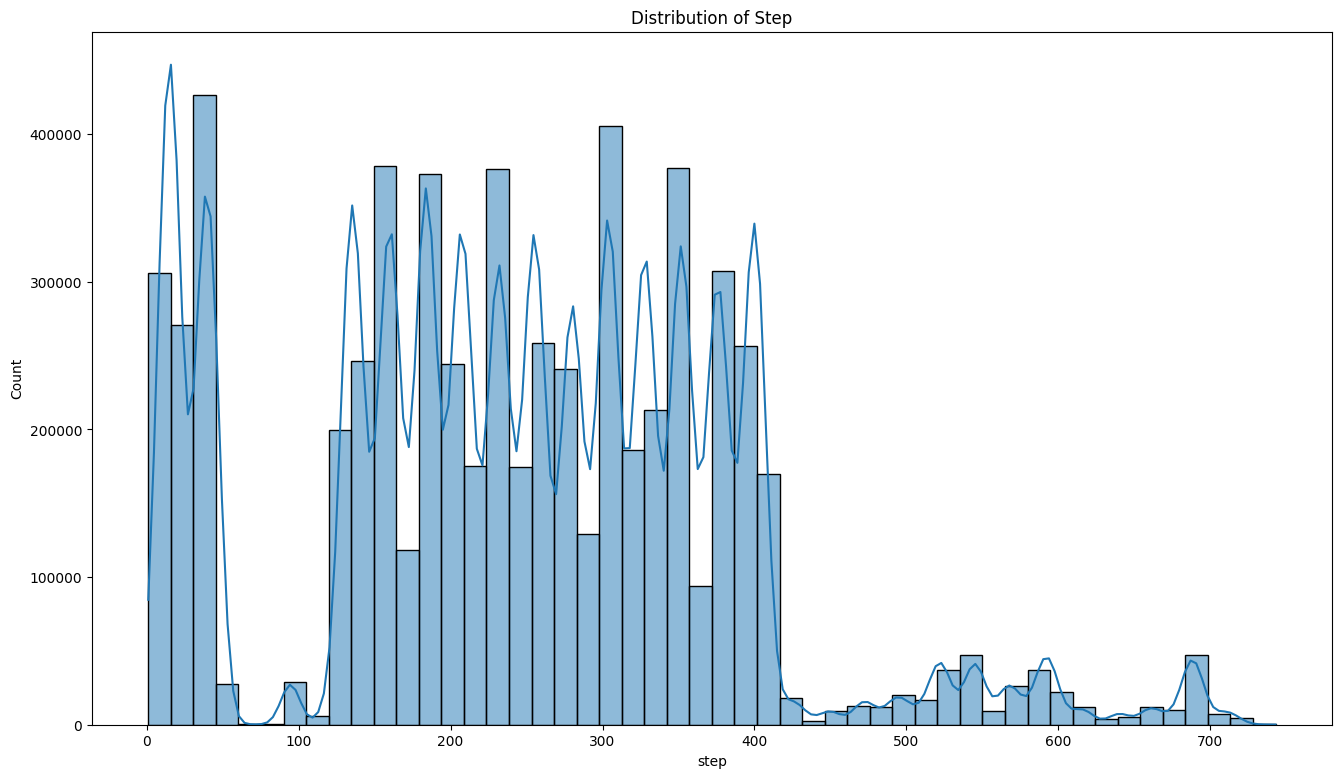

<Figure size 640x480 with 0 Axes>

In [11]:
# distribution of step column using displot

plt.figure(figsize=(16, 9))
sns.histplot(df['step'], bins=50, kde=True)
plt.title('Distribution of Step')
plt.show()
plt.tight_layout()

> The distribution has multiple peaks and valleys, indicating that transactions occur at varying frequencies at different times. There are several prominent peaks in the early steps, suggesting higher transaction volumes during those times. The density drops significantly after step 600, indicating fewer transactions in those later hours.

In [12]:
df['step'].value_counts()

step
19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: count, Length: 743, dtype: int64

> It shows that there are 743 steps, and every step has at least 2 occurrences. With each step representing 1 hour, the dataset contains 743 hours of transactions which is equivalent to 30 days of simulation.

### Answering Question 1:
> **Question:** What are the common types of online payment fraud that occur in the dataset?

In [13]:
# Check the unique values in the column 'type'
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

>By looking at the numbers, it's hard to visualize the proportions of each transaction.
> Thus, we will plot a countplot to better visualize the distribution of dataframe column `type`.

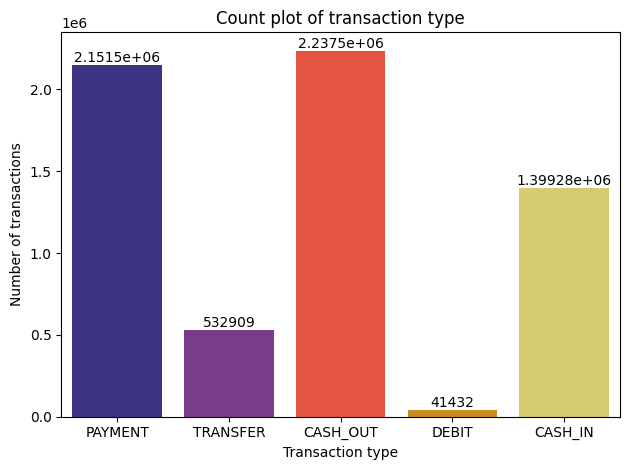

In [14]:
# Using seaborn package to plot the count of each type of transaction
# Type of plot used is countplot
ax = sns.countplot(x='type', data=df, palette='CMRmap')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of transaction type')
plt.xlabel('Transaction type')
plt.ylabel('Number of transactions')
plt.tight_layout()

>From the plot, we can see that cast_out is the most transaction type, followed by payment, cast_in, transfer and debit.
<br><br>
Next, we want to perform analysis on the `isFraud` column.

In [15]:
# Check the unique values in the column 'isFraud'
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

> Again we can use countplot to visualize the dataframe column `isFraud`.

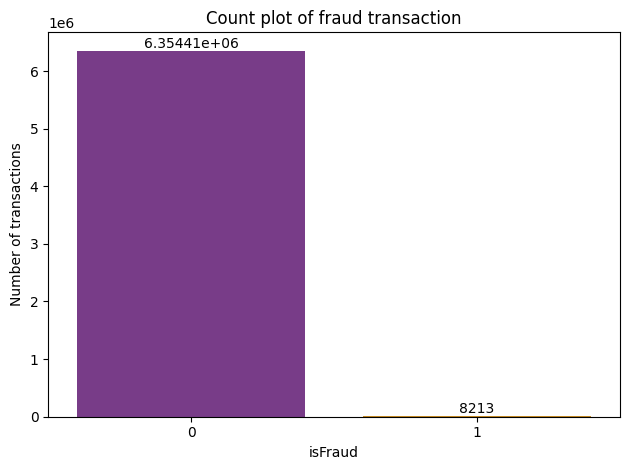

In [16]:
ax = sns.countplot(x='isFraud', data=df, palette='CMRmap')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of fraud transaction')
plt.ylabel('Number of transactions')
plt.tight_layout()

> Next, we want to identify which transaction type are fraudulent.

In [17]:
fraudulent_types = df[df['isFraud'] == 1]['type'].value_counts()
print(fraudulent_types)

type
CASH_OUT    4116
TRANSFER    4097
Name: count, dtype: int64


> After running the above code cell, we can see that only type `cash_out` and `transfer` involved with fraudulent transaction. `cash_out` has 4116 frauds and `transfer` has 4097 frauds. Next, let's plot a countplot to better visualize the result.

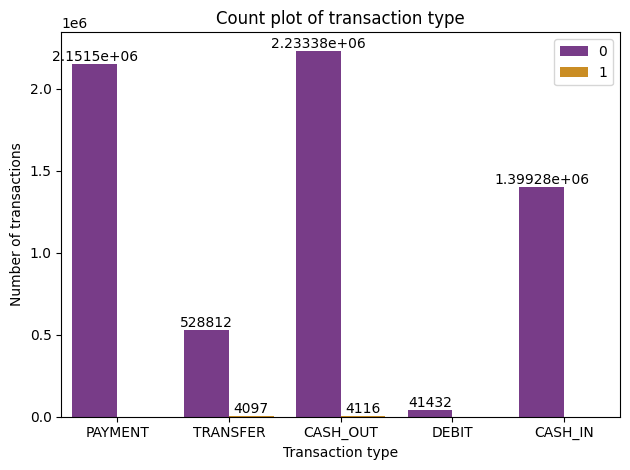

In [18]:
ax = sns.countplot(x='type', data=df, hue='isFraud', palette='CMRmap')
for container in ax.containers:
    ax.bar_label(container)
ax.set_title('Count plot of transaction type')
ax.legend(loc='best')
ax.set_ylabel('Number of transactions')
ax.set_xlabel('Transaction type')
plt.tight_layout()

### Answer for Question 1:
> **Question:** What are the common types of online payment fraud that occur in the dataset? <br>
> **Answer:** The common types of online payment fraud that occur in the dataset are `TRANSFER` and `CASH_OUT`.

### Answering Question 2:
> What are the key features that distinguish fraudulent online transactions from legitimate ones?

> First we will try to see if there is any step pattern when a fraudulent transaction occur to see if there is any correlation between number of transactions against each step category.

In [27]:
fraud_step = df[df['isFraud'] == 1]['step']

print(fraud_step)

2            1
3            1
251          1
252          1
680          1
          ... 
6362615    743
6362616    743
6362617    743
6362618    743
6362619    743
Name: step, Length: 8213, dtype: int64


> Given by the output, it is hard to visualize the step of each fraud transaction. Thus, we will plot a countplot to better visualize it. 

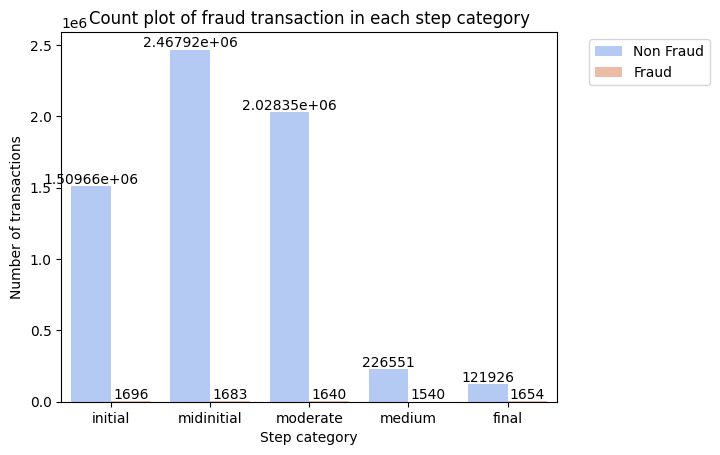

In [28]:
# Step column is cut into 5 bins of 'initial', 'midinitial', 'middle', 'midfinal', 'final'
# This means that 743 Steps are divided into 5 categories.
df['step_category'] = pd.cut(df['step'], 5, labels=['initial', 'midinitial', 'moderate', 'medium', 'final'])

# Count plot
ax = sns.countplot(x='step_category', data=df, hue='isFraud', palette='coolwarm')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of fraud transaction in each step category')

handles, labels = ax.get_legend_handles_labels()
labels = ['Non Fraud' if label == '0' else 'Fraud' for label in labels]
ax.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.ylabel('Number of transactions')
plt.xlabel('Step category')
plt.show()

> The plot shows that at every step category, fraud transactions occurred. Meaning that fraud transactions happens at any time. Now we will visualize through a barplot to see if there is any specific timing that fraud transaction occurs with the 10 highest frequency.

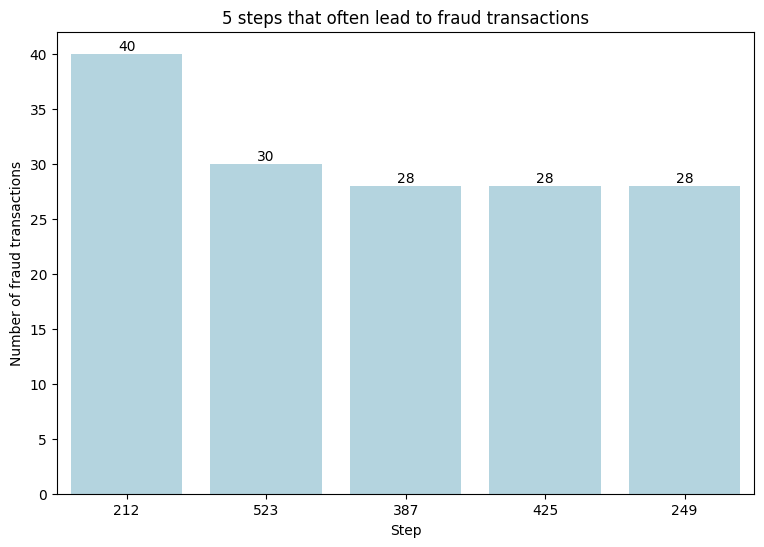

In [29]:
fraud_transac = df[df['isFraud'] == 1]
five_fraud_transac = fraud_transac['step'].value_counts().head(5).reset_index()
five_fraud_transac.columns = ['step', 'count']
five_fraud_transac = five_fraud_transac.sort_values(by='count', ascending=False)  # Sort by count in descending order to see high to low

plt.figure(figsize=(9, 6))
ax = sns.barplot(data=five_fraud_transac, x='step', y='count', color='lightblue', order=five_fraud_transac['step'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('5 steps that often lead to fraud transactions')
plt.ylabel('Number of fraud transactions')
plt.xlabel('Step')
plt.show()

> The plot shows that at every step category, fraud transactions occurred. Meaning that fraud transactions happens at any time. Now we will visualize through a barplot to see if there is any specific timing that fraud transaction occurs with the five highest frequency.

> Next we will see if there is any correlation between number of transactions against transaction quantity through a countplot.

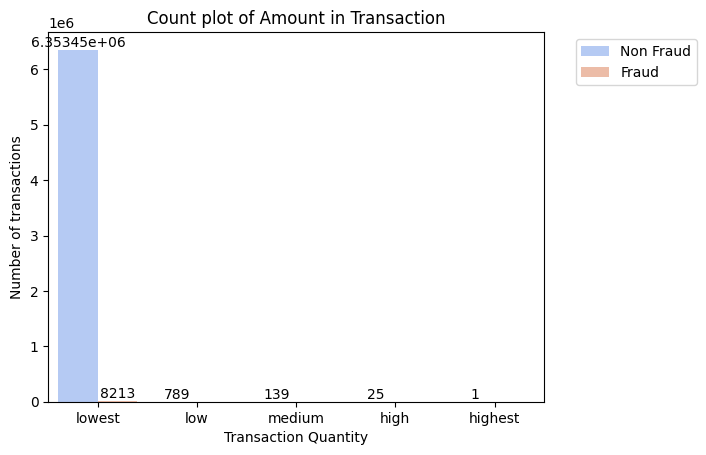

In [30]:
# Amount column is cut into 5 bins of 'lowest', 'low', 'medium', 'high', 'highest'
df['quantity'] = pd.cut(df['amount'], 5, labels=['lowest', 'low', 'medium', 'high', 'highest'])

# Count plot
ax = sns.countplot(x='quantity', data=df, hue='isFraud', palette='coolwarm')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of Amount in Transaction')

handles, labels = ax.get_legend_handles_labels()
labels = ['Non Fraud' if label == '0' else 'Fraud' for label in labels]
ax.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.ylabel('Number of transactions')
plt.xlabel('Transaction Quantity')
plt.show()

> The plot shows all the fraud transactions are in the "lowest" amount category. Meaning that all fraudulent transactions were involved in very small transaction amounts.

> Moving on, we will check if balance of the customer before transaction correlate with fraud transaction.

Text(0.5, 0, 'Initial customers pre-transaction balance amount')

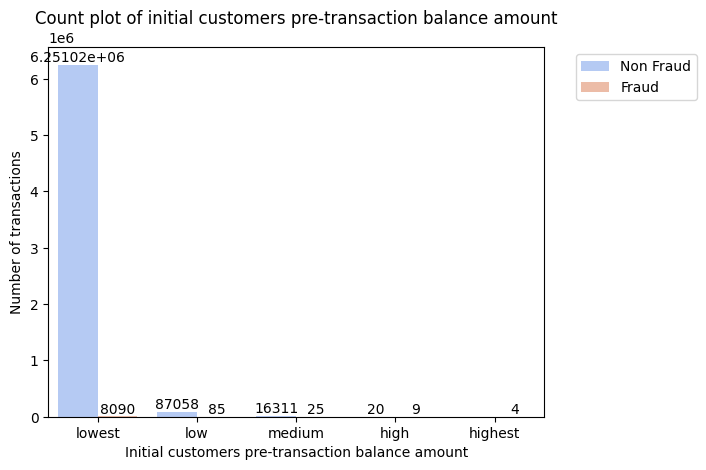

In [31]:
df['oldBalanceOrig_amount'] = pd.cut(df['oldBalanceOrig'], 5, labels=['lowest', 'low', 'medium', 'high', 'highest'])

ax = sns.countplot(x='oldBalanceOrig_amount', data=df, hue='isFraud', palette='coolwarm')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of initial customers pre-transaction balance amount')

handles, labels = ax.get_legend_handles_labels()
labels = ['Non Fraud' if label == '0' else 'Fraud' for label in labels]
ax.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left')
          
plt.ylabel('Number of transactions')
plt.xlabel('Initial customers pre-transaction balance amount')

> The plot shows that fraud transactions are concentrated at customers with the lowest pre-transaction balances. This implies that customers with very low pre-transaction balances may be more vulnerable to fraud transactions.

> Lastly, we will check if balance of the receipent before transaction correlate with fraud transaction through a countplot.

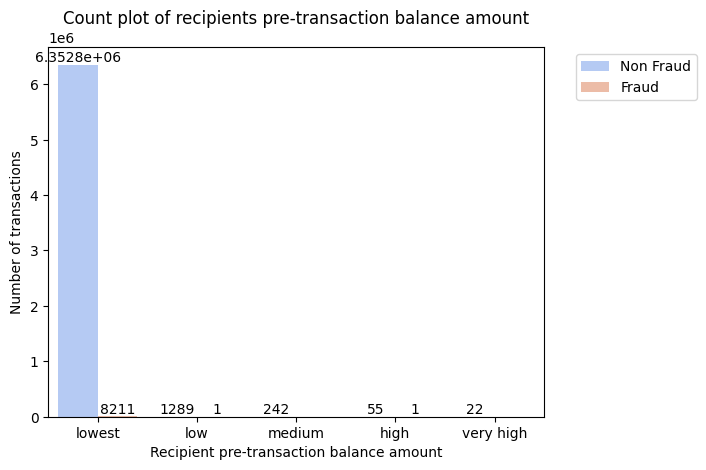

In [32]:
df['oldBalanceDest_amount'] = pd.cut(df['oldBalanceDest'], 5, labels=['lowest', 'low', 'medium', 'high', 'very high'])

ax = sns.countplot(x='oldBalanceDest_amount', data=df, hue='isFraud', palette='coolwarm')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot of recipients pre-transaction balance amount')

handles, labels = ax.get_legend_handles_labels()
labels = ['Non Fraud' if label == '0' else 'Fraud' for label in labels]
ax.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left')
          
plt.ylabel('Number of transactions')
plt.xlabel('Recipient pre-transaction balance amount')
plt.show()

> The plot shows that fraud transactions are concentrated at recipients with the lowest pre-transaction balances. This indicates that recipients with very low pre-transaction balances may be more susceptible to fraud transactions.

### Answer for Question 2:
> Key features of fraud transactions are low amount of transactions, low initial customer balance before transaction and low recipient pre-transaction balance amount.

### Answering Question 3:
> Which payment method has the highest fraudulent transactions by percentage, and which has the lowest percentage?

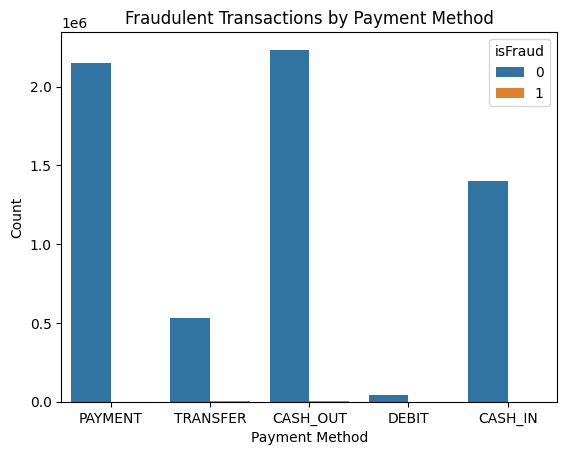

In [33]:
sns.countplot(x="type", hue="isFraud", data=df)
plt.title("Fraudulent Transactions by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.show()

> Tried to perform a general comparison chart, however, the amount of fraudulent transactions when compared to non-fraudulent transactions is immaculately miniscule. So, we moved to another method

In [34]:
fraud_by_type = df.groupby("type")["isFraud"].sum().reset_index()
fraud_by_type.columns = ["Payment Type", "Fraudulent Transactions"]
fraud_by_type

,Payment Type,Fraudulent Transactions
0,CASH_IN,0
1,CASH_OUT,4116
2,DEBIT,0
3,PAYMENT,0
4,TRANSFER,4097


> We then calculated the amount of fraudulent transactions based on the payment type, however, this does not give us the full picture.

In [35]:
fraud_rate = df.groupby("type")["isFraud"].mean().reset_index()
fraud_rate.columns = ["Payment Method", "Fraud Rate"]
fraud_rate.sort_values("Fraud Rate", ascending=False)

,Payment Method,Fraud Rate
4,TRANSFER,0.007688
1,CASH_OUT,0.001840
0,CASH_IN,0.000000
2,DEBIT,0.000000
3,PAYMENT,0.000000


> We then calculated the fraud rate of each payment method, which resulted in Transfer having the most, while cash_in, debit, and payment having zero fraud rate. Referring back to the previous code, I did mention that the amount of fraudulent transactions does not give us the full picture, here we can see although cash_out has more fraudulent transactions by numbers, its fraud rate is smaller compared to transfer.

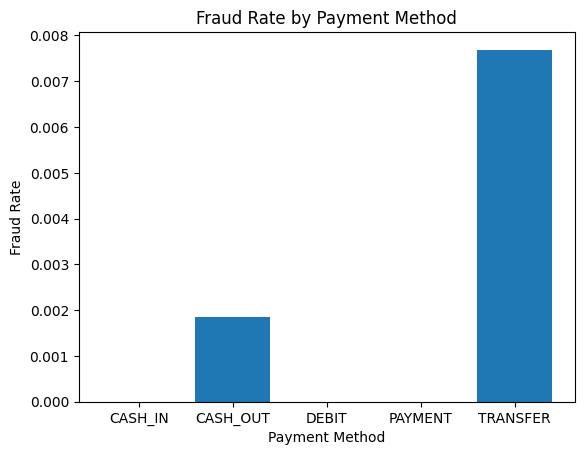

In [36]:
plt.bar(fraud_rate["Payment Method"], fraud_rate["Fraud Rate"])
plt.xlabel("Payment Method")
plt.ylabel("Fraud Rate")
plt.title("Fraud Rate by Payment Method")
plt.show()

### Answer for Question 3:
> `TRANSFER` has the highest percentage rate of the transaction being a fraudulent transaction, followed by `CASH_OUT`. The lowest percentage of fraudulent transactions based on payment methods compared to total transactions are `CASH_IN`, `DEBIT`, and `PAYMENT`.

## 5. Data Mining / Data Modelling

### 5.1 Data Mining: Clustering

In [37]:
# Create a copy of the original dataframe for data mining and modelling
df_model = df.copy()

In [39]:
# Drop the columns that are added for EDA
df_model = df_model.drop(['quantity', 'oldBalanceOrig_amount', 'oldBalanceDest_amount', 'step_category'], axis=1)
df_model.head()

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


> Normalizing the data. We use `scikit-learn` package's `LabelEncoder` to normalize our data.

In [40]:
# Normalizing the transaction types to better train the data
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df_cat = df_model['type'].values
df_cat_encoded = encoder.fit_transform(df_cat)
df_cat_encoded

array([3, 3, 4, ..., 1, 4, 1])

In [41]:
# checking the encoded values in the column 'type'
encoding_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print(encoding_mapping)

{'CASH_IN': 0, 'CASH_OUT': 1, 'DEBIT': 2, 'PAYMENT': 3, 'TRANSFER': 4}


In [42]:
df_model['type'] = encoder.fit_transform(df_model['type'])
df_model.head()

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [43]:
# Drop the columns 'nameOrig', 'nameDest' and 'isFlaggedFraud' as they are not useful for the model
df_model = df_model.drop(columns = ['nameOrig', 'nameDest', 'isFlaggedFraud'])
df_model.head()

,step,type,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,isFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1
3,1,1,181.00,181.0,0.00,21182.0,0.0,1
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0


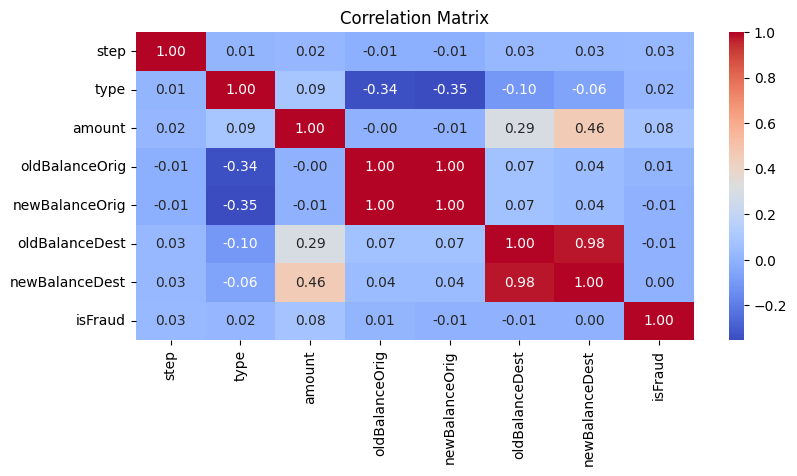

<Figure size 640x480 with 0 Axes>

In [44]:
# checking features correlation
corr = df_model.corr()
plt.figure(figsize=(9,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
plt.tight_layout()

#### K-Means Clustering on dataset to find hidden patterns

In [45]:
# Import the necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

> To perform clustering, we first take columns that have meaningful numerical values and those that could provide insights into the behavior of transactions. Then we apply the K-Means algorithm to cluster these values. Finally, we use scatter plots to visualize the clusters.

In [46]:
# Create a new copy of df_model for clustering
df_mine = df_model.copy()

# Features selection
features = ['amount', 'oldBalanceOrig', 'newBalanceOrig', 'oldBalanceDest', 'newBalanceDest']

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_mine[features])

#### Choosing the optimal number of clusters
> To determine the optimal number of clusters, we use Elbow Method.

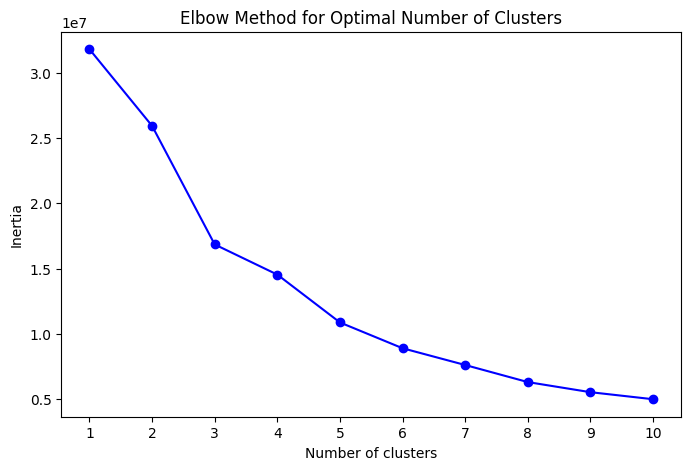

In [47]:
# Use the Elbow method to find the optimal number of clusters
# Reference: https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xticks(K)
plt.show()

> By observing the Elbow Method graph, cluster 3 represents an elbow point, thus we will train kmeans model with 3 clusters.

#### Training the Model

In [48]:
# Fit the KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=1, n_init='auto')
kmeans_cluster = kmeans.fit_predict(scaled_features)
kmeans_cluster

array([0, 0, 0, ..., 2, 0, 0])

#### Visualizing the K-Means Model with the best clusters

### 5.2 Data Modelling: Building Classification Models
> Since we want to predict results based on categorical variables (column `isFraud`), the type of predictive models we'll use in this case is classification models.

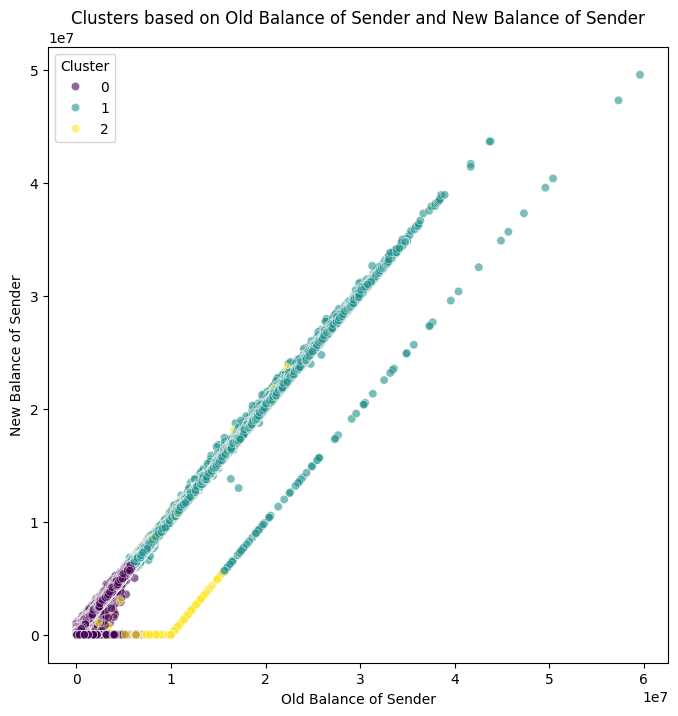

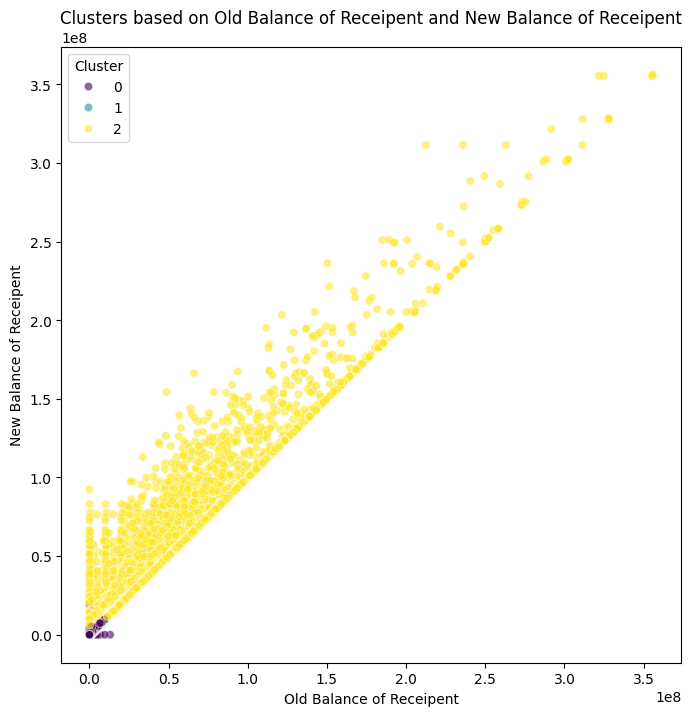

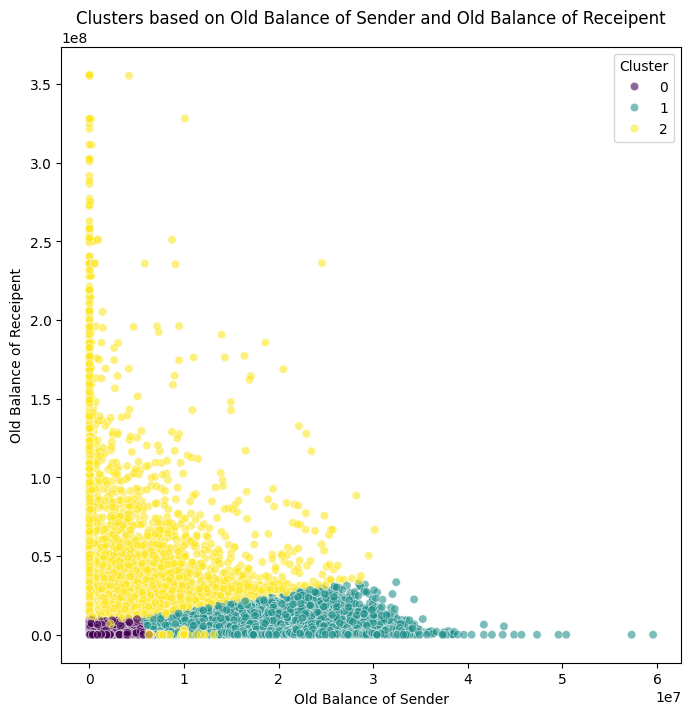

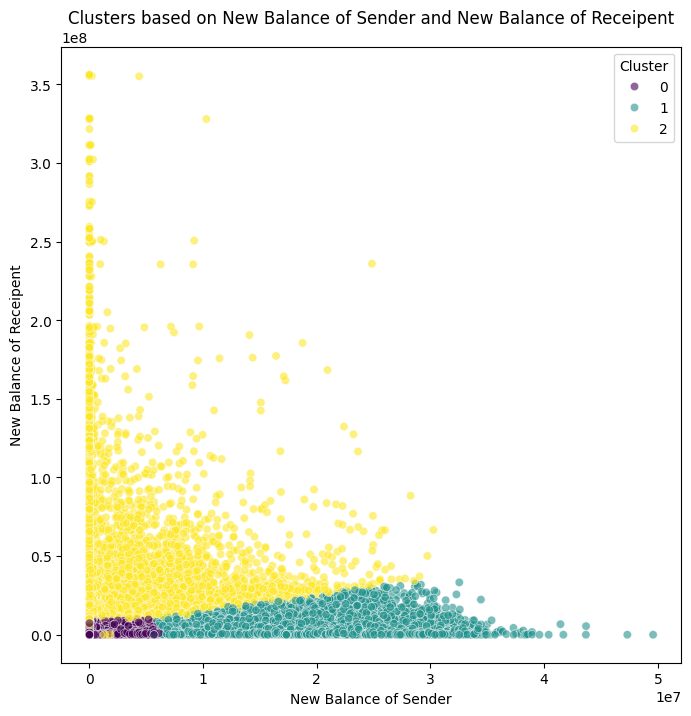

<Figure size 640x480 with 0 Axes>

In [49]:
# Visualize the clusters on oldBalanceOrig and newBalanceOrig
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_mine, x='oldBalanceOrig', y='newBalanceOrig', hue=kmeans_cluster, palette='viridis', alpha=0.6)
plt.title('Clusters based on Old Balance of Sender and New Balance of Sender')
plt.xlabel('Old Balance of Sender')
plt.ylabel('New Balance of Sender')
plt.legend(title='Cluster')
plt.show()

# Visualize the clusters on oldBalanceDest and newBalanceDest
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_mine, x='oldBalanceDest', y='newBalanceDest', hue=kmeans_cluster, palette='viridis', alpha=0.6)
plt.title('Clusters based on Old Balance of Receipent and New Balance of Receipent')
plt.xlabel('Old Balance of Receipent')
plt.ylabel('New Balance of Receipent')
plt.legend(title='Cluster')
plt.show()

# Visualize the clusters on oldBalanceOrig and oldBalanceDest
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_mine, x='oldBalanceOrig', y='oldBalanceDest', hue=kmeans_cluster, palette='viridis', alpha=0.6)
plt.title('Clusters based on Old Balance of Sender and Old Balance of Receipent')
plt.xlabel('Old Balance of Sender')
plt.ylabel('Old Balance of Receipent')
plt.legend(title='Cluster')
plt.show()

# Visualize the clusters on newBalanceOrig and newBalanceDest
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_mine, x='newBalanceOrig', y='newBalanceDest', hue=kmeans_cluster, palette='viridis', alpha=0.6)
plt.title('Clusters based on New Balance of Sender and New Balance of Receipent')
plt.xlabel('New Balance of Sender')
plt.ylabel('New Balance of Receipent')
plt.legend(title='Cluster')
plt.show()

plt.tight_layout()

### Classification Model Training 1: Logistic Regression

In [53]:
# Import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import metrics

> #### Step 1: Feature Selection
> Select the relevant data to train

In [54]:
# Data preprocessing already done when plotting a heatmap
X = df_model.drop(columns=['isFraud'], axis=1)
y = df_model['isFraud'].copy()

> #### Step 2: Split Data
> Split the data into training and testing sets

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# check shapes after splitting
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (4771965, 7)
X_test shape is  (1590655, 7)
y_train shape is  (4771965,)
y_test shape is  (1590655,)


> #### Step 3: Scale the data

In [56]:
# Standardization (Z-Score Normalization) 
# StandardScaler for Data
# Reference: https://www.kaggle.com/code/georgehanymilad/online-payments-fraud-detection

scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data Scaling Done")

Data Scaling Done


> Description of the scaling:
> * Standardization Applied: This code cell implements standardization, which scales features in the data to have a mean of 0 and a standard deviation of 1.
> * Generalization: Help the model generalize better to unseen data and avoid overfitting to the specific training data.

> #### Step 4: Train the model
> Train the base model.

In [57]:
log_model = LogisticRegression(random_state=1)
log_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=1)

> #### Step 5: Evaluate the model

In [58]:
# Make predictions
y_pred_lg = log_model.predict(X_test_scaled)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred_lg)
class_report = classification_report(y_test, y_pred_lg)
roc_auc = roc_auc_score(y_test, y_pred_lg)

# Print the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print("\nROC-AUC Score:")
print(roc_auc)

Confusion Matrix:
[[1588482     104]
 [   1194     875]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588586
           1       0.89      0.42      0.57      2069

    accuracy                           1.00   1590655
   macro avg       0.95      0.71      0.79   1590655
weighted avg       1.00      1.00      1.00   1590655


ROC-AUC Score:
0.7114220755738191


> Evaluate the results in %.

In [59]:
# Accuracy = (TP + TN) / (TP + TN + FP + FN)
Accuracy_LR = accuracy_score(y_test, y_pred_lg)
print(f'Accuracy Score : {Accuracy_LR * 100 : .2f} %\n')


# Precision = TP / (TP + FP)
Precision_LR = precision_score(y_test, y_pred_lg)
print(f'Precision Score : {Precision_LR * 100 : .2f} %\n')


# Recall = TP / (TP + FN)
Recall_LR = recall_score(y_test, y_pred_lg)
print(f'Recall Score : {Recall_LR * 100 : .2f} %\n')


# F1 Score = 2 × ((Precision * Recall) / (Precision + Recall))
F1_Score_LR = f1_score(y_test, y_pred_lg)
print(f'F1 Score : {F1_Score_LR * 100 : .2f} %\n')


ROC_AUC_LR = roc_auc_score(y_test, y_pred_lg)
print(f'AUC_ROC : {ROC_AUC_LR * 100 : .2f} %\n')

Accuracy Score :  99.92 %

Precision Score :  89.38 %

Recall Score :  42.29 %

F1 Score :  57.41 %

AUC_ROC :  71.14 %



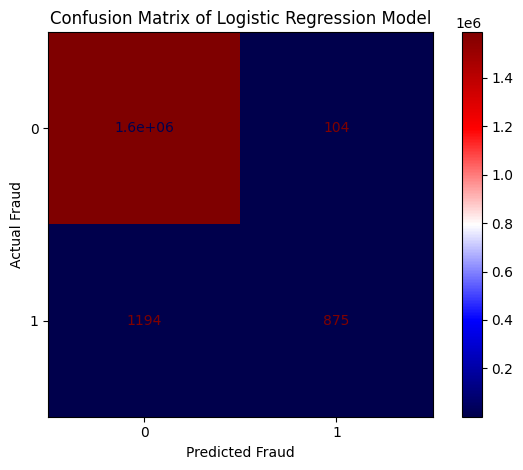

In [60]:
# Create a more intepretable visual dispaly of the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_lg), display_labels=log_model.classes_)
cm_display.plot(cmap='seismic')
plt.title('Confusion Matrix of Logistic Regression Model')
plt.xlabel('Predicted Fraud')
plt.ylabel('Actual Fraud')
plt.tight_layout()
plt.show()

> ##### *Confusion Matrix*:
> * True Negatives (TN): 1,588,482 - These are the legitimate transactions correctly identified as non-fraudulent.
> * False Positives (FP): 104 - These are the legitimate transactions incorrectly identified as fraudulent.
> * False Negatives (FN): 1,194 - These are the fraudulent transactions incorrectly identified as legitimate.
> * True Positives (TP): 875 - These are the fraudulent transactions correctly identified as fraudulent.

> ##### *Classification Report*:
| Class | Precision | Recall | F1-Score | Support |
| :-: | :- | :- | :- | :- |
| 0 | All predicted non-fraud are truly non-fraud. | All actual non-fraud are correctly identified. | High accuracy for non-fraud predictions | Number of actual occurences. |
| 1 | 89.38% predicted non-fraud are truly fraud. | 42.29% actual fraud are correctly identified. | Moderate performance in detecting fraudulent transactions. | Number of actual occurences. |

> ##### *ROC-AUC Score*:
> * The ROC-AUC score of approximately **0.7114** indicates the model's ability to distinguish between the classes (fraudulent and non-fraudulent). A score of 0.9185 means that there's an **71.14%** chance that the model will be able to distinguish a randomly chosen fraudulent transaction from a randomly chosen non-fraudulent one. An ROC-AUC score of 0.5 would indicate a model with no discriminatory power (random guessing), while a score of 1.0 indicates perfect discriminatory power.

> ##### Interpretation:
> 1. **Non-Fraudulent Transactions**: The model performs exceptionally well in identifying non-fraudulent transactions, with both precision and recall close to 1.0.
> 2. **Fraudulent Transactions**: The model shows moderate performance in identifying fraudulent transactions, with a precision of 0.88 but a relatively low recall of 0.42. This means that while the model is quite accurate when it predicts a transaction as fraudulent, it misses a significant portion of actual fraudulent transactions.
> 3. **Overall Performance**: The high overall accuracy and the ROC-AUC score **0.7114** suggest that the model is generally good at distinguishing between fraudulent and non-fraudulent transactions.

### Classification Model Training 2: Decision Tree

In [61]:
# Import the necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

> #### Step 1, Step 2 and Step 3 done in first model (Logistic Regression), no need to split the data again.

> #### Step 4: Train the model
> Train the base model.

In [62]:
dt_model = DecisionTreeClassifier(max_depth=7, random_state=1)
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=7, random_state=1)

> #### Step 5: Evaluate the model

In [63]:
# Make predictions
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred_dt)
class_report = classification_report(y_test, y_pred_dt)
roc_auc = roc_auc_score(y_test, y_pred_dt)

# Print the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print("\nROC-AUC Score:")
print(roc_auc)

Confusion Matrix:
[[1588488      98]
 [    568    1501]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588586
           1       0.94      0.73      0.82      2069

    accuracy                           1.00   1590655
   macro avg       0.97      0.86      0.91   1590655
weighted avg       1.00      1.00      1.00   1590655


ROC-AUC Score:
0.8627047760321723


> Evaluate the results in %.

In [64]:
# Accuracy = (TP + TN) / (TP + TN + FP + FN)
Accuracy_LR = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy Score : {Accuracy_LR * 100 : .2f} %\n')


# Precision = TP / (TP + FP)
Precision_LR = precision_score(y_test, y_pred_dt)
print(f'Precision Score : {Precision_LR * 100 : .2f} %\n')


# Recall = TP / (TP + FN)
Recall_LR = recall_score(y_test, y_pred_dt)
print(f'Recall Score : {Recall_LR * 100 : .2f} %\n')


# F1 Score = 2 × ((Precision * Recall) / (Precision + Recall))
F1_Score_LR = f1_score(y_test, y_pred_dt)
print(f'F1 Score : {F1_Score_LR * 100 : .2f} %\n')


ROC_AUC_LR = roc_auc_score(y_test, y_pred_dt)
print(f'AUC_ROC : {ROC_AUC_LR * 100 : .2f} %\n')

Accuracy Score :  99.96 %

Precision Score :  93.87 %

Recall Score :  72.55 %

F1 Score :  81.84 %

AUC_ROC :  86.27 %



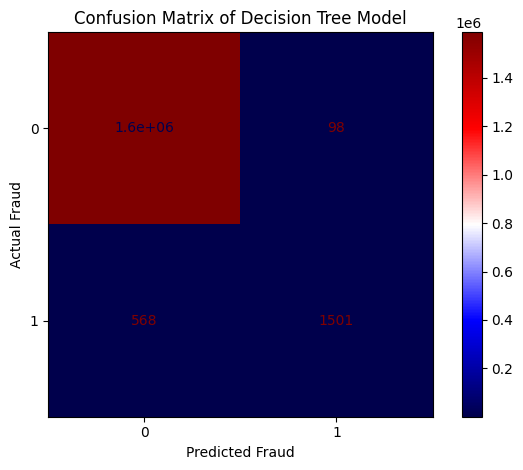

In [65]:
# Create a more intepretable visual dispaly of the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_dt), display_labels=dt_model.classes_)
cm_display.plot(cmap='seismic')
plt.title('Confusion Matrix of Decision Tree Model')
plt.xlabel('Predicted Fraud')
plt.ylabel('Actual Fraud')
plt.tight_layout()
plt.show()

> ##### *Confusion Matrix*:
> * True Negatives (TN): 1,588,488 - These are the transactions correctly identified as non-fraudulent.
> * False Positives (FP): 98 - These are the transactions incorrectly identified as fraudulent.
> * False Negatives (FN): 568 - These are the fraudulent transactions that were incorrectly identified as non-fraudulent.
> * True Positives (TP): 1,501 - These are the transactions correctly identified as fraudulent.

> ##### *Classification Report*:
| Class | Precision | Recall | F1-Score | Support |
| :-: | :- | :- | :- | :- |
| 0 | All predicted non-fraud are truly non-fraud. | All actual non-fraud are correctly identified. | High accuracy for non-fraud predictions | Number of actual occurences. |
| 1 | 93.93% predicted non-fraud are truly fraud. | 72.55% actual fraud are correctly identified. | Good performance in detecting fraudulent transactions. | Number of actual occurences. |

> ##### *ROC-AUC Score*:
> * The ROC-AUC score of approximately **0.8627** indicates the model's ability to distinguish between the classes (fraudulent and non-fraudulent). A score of 0.8627 means that there's an **86.27%** chance that the model will be able to distinguish a randomly chosen fraudulent transaction from a randomly chosen non-fraudulent one.

> ##### Interpretation:
> 1. **High Accurarcy**: The model has a very high accuracy, correctly identifying almost all transactions. This is evident from the confusion matrix and the accuracy score.
> 2. **High Precision for Fraudulent Transactions**: The model has a high precision for fraudulent transactions (0.94), meaning it has a low false positive rate. When it predicts a transaction as fraudulent, it is very likely to be correct.
> 3. **Strong Overall Performance**: The weighted averages are very high, showing that the model performs well overall, but it might be slightly biased due to the imbalance in the dataset (more non-fraudulent than fraudulent transactions).
> 4. **Good Discriminative Ability**: The ROC-AUC score of **0.8627** indicates that the model has an excellent ability to distinguish between fraudulent and non-fraudulent transactions.

> #### Step 6: Visualizing the decision tree

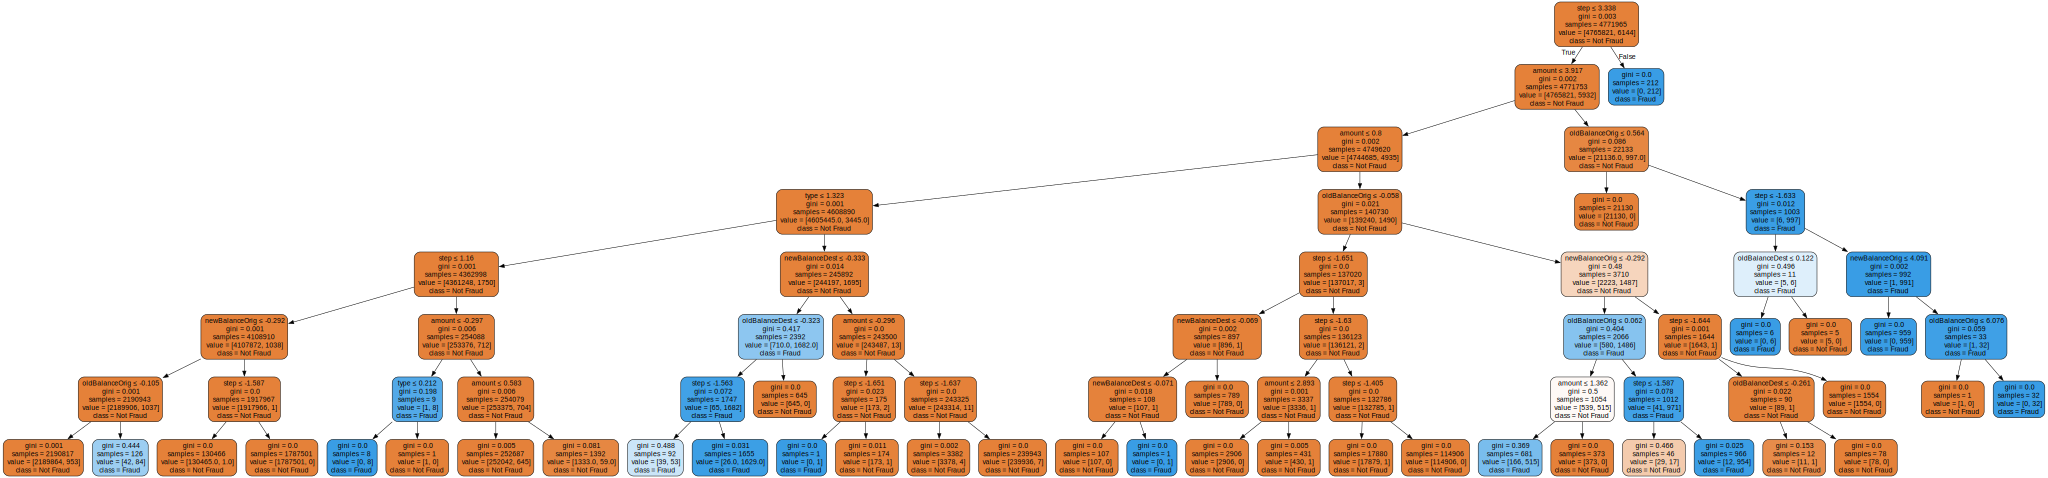

In [75]:
# Visualize the decision tree (requires graphviz to be installed)
# Reference: https://www.datacamp.com/tutorial/decision-tree-classification-python
from sklearn.tree import export_graphviz
import graphviz
import os

# Add the path to the Graphviz executables to the system's PATH
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin'

# Export the tree to a .pdf file with features
dot_data = export_graphviz(dt_model, out_file=None, 
                           feature_names=X.columns,  
                           class_names=['Not Fraud', 'Fraud'],  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("decision_tree_b4_tuned")  # This will save the decision tree as a .pdf file
graph # This will display the decision tree in the notebook, but it may be too large to view. Comment out if needed.

### Classification Model Training 3: Naive Bayes classifier

In [66]:
from sklearn.naive_bayes import GaussianNB

> #### Step 1, Step 2 and Step 3 done in first model (Logistic Regression), no need to split the data again.

> #### Step 4: Train the model
> Train the base model.

In [67]:
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

GaussianNB()

> #### Step 5: Evaluate the model

In [68]:
# Make predictions
y_pred_nb = nb_model.predict(X_test_scaled)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred_nb)
class_report = classification_report(y_test, y_pred_nb)
roc_auc = roc_auc_score(y_test, y_pred_nb)

# Print the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print("\nROC-AUC Score:")
print(roc_auc)

Confusion Matrix:
[[1577741   10845]
 [   1715     354]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1588586
           1       0.03      0.17      0.05      2069

    accuracy                           0.99   1590655
   macro avg       0.52      0.58      0.52   1590655
weighted avg       1.00      0.99      0.99   1590655


ROC-AUC Score:
0.5821351612559085


> Evaluate the results in %.

In [69]:
# Accuracy = (TP + TN) / (TP + TN + FP + FN)
Accuracy_LR = accuracy_score(y_test, y_pred_nb)
print(f'Accuracy Score : {Accuracy_LR * 100 : .2f} %\n')


# Precision = TP / (TP + FP)
Precision_LR = precision_score(y_test, y_pred_nb)
print(f'Precision Score : {Precision_LR * 100 : .2f} %\n')


# Recall = TP / (TP + FN)
Recall_LR = recall_score(y_test, y_pred_nb)
print(f'Recall Score : {Recall_LR * 100 : .2f} %\n')


# F1 Score = 2 × ((Precision * Recall) / (Precision + Recall))
F1_Score_LR = f1_score(y_test, y_pred_nb)
print(f'F1 Score : {F1_Score_LR * 100 : .2f} %\n')


ROC_AUC_LR = roc_auc_score(y_test, y_pred_nb)
print(f'AUC_ROC : {ROC_AUC_LR * 100 : .2f} %\n')

Accuracy Score :  99.21 %

Precision Score :  3.16 %

Recall Score :  17.11 %

F1 Score :  5.34 %

AUC_ROC :  58.21 %



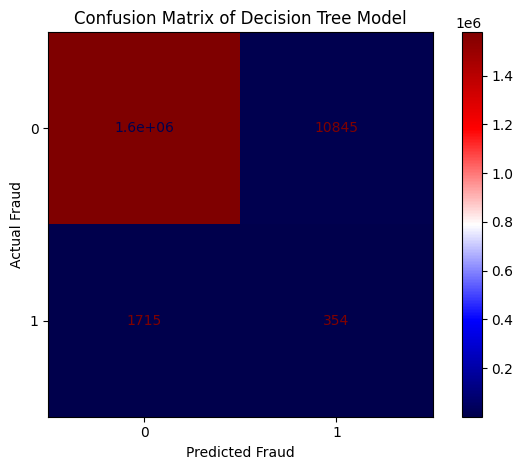

In [70]:
# Create a more intepretable visual dispaly of the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_nb), display_labels=nb_model.classes_)
cm_display.plot(cmap='seismic')
plt.title('Confusion Matrix of Decision Tree Model')
plt.xlabel('Predicted Fraud')
plt.ylabel('Actual Fraud')
plt.tight_layout()
plt.show()

> ##### *Confusion Matrix*:
> * True Negatives (TN): 1,584,014 - These are the transactions correctly identified as non-fraudulent.
> * False Positives (FP): 10,845 - These are the transactions incorrectly identified as fraudulent
> * False Negatives (FN): 1,715 - These are the fraudulent transactions that were incorrectly identified as non-fraudulent.
> * True Positives (TP): 354 - These are the transactions correctly identified as fraudulent.

> ##### *Classification Report*:
| Class | Precision | Recall | F1-Score | Support |
| :-: | :- | :- | :- | :- |
| 0 | All predicted non-fraud are truly non-fraud. | All actual non-fraud are correctly identified. | High accuracy for non-fraud predictions | Number of actual occurences. |
| 1 | 3.16% predicted non-fraud are truly fraud. | 17.11% actual fraud are correctly identified. | Poor performance in detecting fraudulent transactions. | Number of actual occurences. |

> ##### *ROC-AUC Score*:
> * The ROC-AUC score of approximately **0.5821** indicates the model's ability to distinguish between the classes (fraudulent and non-fraudulent). A score of 0.5510 means that there's an **58.21%** chance that the model will be able to distinguish a randomly chosen fraudulent transaction from a randomly chosen non-fraudulent one.

> ##### Interpretation:
> 1. **Poor ROC-AUC score**: The low score of 0.58 which is slightly better than random guessing (0.5) indicates that the model is not effectively distinguishing between fraudulent and non-fraudulent transactions.
> 2. **Poor Fraud Detection**: The model performs poorly in detecting fraudulent transactions, with low precision (0.03), recall (0.17), and F1-score (0.05). This means it has a high rate of both false positives and false negatives for fraud.

### Answer for Question 4:
> **Question:** Which machine learning algorithms are most effective for detecting online payment fraud in this dataset? <br>
> **Answer:** After performing analysis on 3 models: Logistic Regression, Decision Tree & Naive Bayes classifier, the ROC-AUC score (score for classification tasks) for Logistic Regression is 0.7124, Decision Tree is 0.9195 while Naive Bayes classifier is 0.5510. This shows that **Decision Tree** has the highest score among all 3 models and are the most effective at detecting online payment fraud in this dataset.

### 5.3 Model Tuning
> #### Step 1: Find the best hyperparameters
> After we've identify that the **Decision Tree** is the best classification model to detect online payment fraud, we'll perform hyperparameter tuning to get the best result from it.

In [49]:
# To determine the most optimal max_depth of the decision tree, we will use k-fold cross-validation
# Reference: https://stackoverflow.com/questions/49289187/decision-tree-sklearn-depth-of-tree-and-accuracy
# It will take about an hour to run this code, and result already printed below, so no need to run this cell
from sklearn.model_selection import cross_val_score
import numpy as np

L = []
depth_range = range(1, 21)
for i in depth_range:
    dtree = DecisionTreeClassifier(max_depth=i) # Create a DecisionTreeClassifier object
    scores = cross_val_score(dtree, X_train, y_train, cv=5, scoring='accuracy') # 5-fold cross-validation
    L.append(np.mean(scores))  # Use the mean accuracy across cross-validation folds

optimal_depth = depth_range[L.index(max(L))] # Find the optimal max_depth
print("Optimal max_depth:", optimal_depth)
print("Max accuracy:", max(L))

Optimal max_depth: 19
Max accuracy: 0.9996959323884396


> We use grid search to find the best hyperparameters.

In [57]:
# To determine the best hyperparameters for the DecisionTreeClassifier, we will use GridSearchCV
# It will take about 6 hours to run this code, and result already printed below, so no need to run this cell
# Reference: https://www.analyticsvidhya.com/blog/2021/06/tune-hyperparameters-with-gridsearchcv/
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define hyperparameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 10),
    'max_features': ['auto', 'sqrt']
}

# Create a DecisionTreeClassifier with K-fold CV for evaluation
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your training data
grid_search.fit(X_train_scaled, y_train)

# Access the best hyperparameters and model
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the results
print("Best model:", best_model)
print("Best hyperparameters:", best_params)
print("Best score:", grid_search.best_score_)

# To get average accuracy achievec on each fold of cross-validation
cv_results = grid_search.cv_results_
mean_test_scores = cv_results['mean_test_score']

print("Mean test scores across all parameter combinations:", mean_test_scores)

# To see which features were most influential in the model's predictions with the best hyperparameters
print("Feature importances:", best_model.feature_importances_)

Best model: DecisionTreeClassifier(max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=3)
Best hyperparameters: {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 3}
Best score: 0.9996322269756798
Mean test scores across all parameter combinations: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan 

> #### Step 2: Retrain the model
> We retrain the model with the best hyperparameters identified earlier.

In [71]:
# Train the model with the best hyperparameters
dt_model_tuned = DecisionTreeClassifier(max_depth=19, random_state=1, max_features='sqrt', min_samples_leaf=4, min_samples_split=3, criterion='gini')
dt_model_tuned.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=19, max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=3, random_state=1)

> #### Step 3: Evaluate the model

In [72]:
# Make predictions
y_pred_dt_tuned = dt_model_tuned.predict(X_test_scaled)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred_dt_tuned)
class_report = classification_report(y_test, y_pred_dt_tuned)
roc_auc = roc_auc_score(y_test, y_pred_dt_tuned)

# Print the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print("\nROC-AUC Score:")
print(roc_auc)

Confusion Matrix:
[[1588492      94]
 [    453    1616]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588586
           1       0.95      0.78      0.86      2069

    accuracy                           1.00   1590655
   macro avg       0.97      0.89      0.93   1590655
weighted avg       1.00      1.00      1.00   1590655


ROC-AUC Score:
0.8904972384933718


In [73]:
# Accuracy = (TP + TN) / (TP + TN + FP + FN)
Accuracy_LR = accuracy_score(y_test, y_pred_dt_tuned)
print(f'Accuracy Score : {Accuracy_LR * 100 : .2f} %\n')


# Precision = TP / (TP + FP)
Precision_LR = precision_score(y_test, y_pred_dt_tuned)
print(f'Precision Score : {Precision_LR * 100 : .2f} %\n')


# Recall = TP / (TP + FN)
Recall_LR = recall_score(y_test, y_pred_dt_tuned)
print(f'Recall Score : {Recall_LR * 100 : .2f} %\n')


# F1 Score = 2 × ((Precision * Recall) / (Precision + Recall))
F1_Score_LR = f1_score(y_test, y_pred_dt_tuned)
print(f'F1 Score : {F1_Score_LR * 100 : .2f} %\n')


ROC_AUC_LR = roc_auc_score(y_test, y_pred_dt_tuned)
print(f'AUC_ROC : {ROC_AUC_LR * 100 : .2f} %\n')

Accuracy Score :  99.97 %

Precision Score :  94.50 %

Recall Score :  78.11 %

F1 Score :  85.53 %

AUC_ROC :  89.05 %



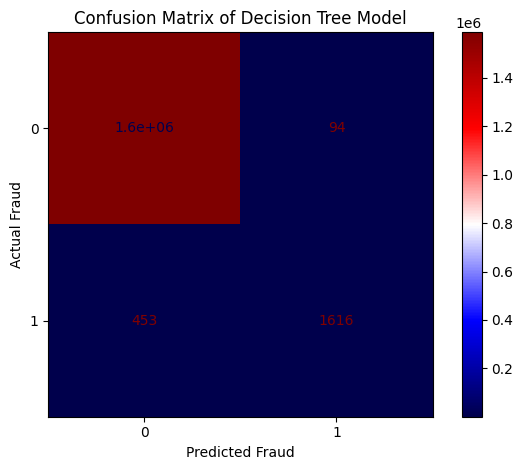

In [74]:
# Create a more intepretable visual dispaly of the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_dt_tuned), display_labels=dt_model_tuned.classes_)
cm_display.plot(cmap='seismic')
plt.title('Confusion Matrix of Decision Tree Model')
plt.xlabel('Predicted Fraud')
plt.ylabel('Actual Fraud')
plt.tight_layout()
plt.show()

> ##### *Confusion Matrix*:
> * True Negatives (TN): 1,588,492 - These are the transactions correctly identified as non-fraudulent.
> * False Positives (FP): 94 - These are the transactions incorrectly identified as fraudulent
> * False Negatives (FN): 453 - These are the fraudulent transactions that were incorrectly identified as non-fraudulent.
> * True Positives (TP): 1,616 - These are the transactions correctly identified as fraudulent.

> ##### *Classification Report*:
| Class | Precision | Recall | F1-Score | Support |
| :-: | :- | :- | :- | :- |
| 0 | All predicted non-fraud are truly non-fraud. | All actual non-fraud are correctly identified. | High accuracy for non-fraud predictions | Number of actual occurences. |
| 1 | 94.50% predicted non-fraud are truly fraud. | 78.11% actual fraud are correctly identified. | Great performance in detecting fraudulent transactions. | Number of actual occurences. |

> ##### *ROC-AUC Score*:
> * The ROC-AUC score of approximately **0.8905** indicates the model's ability to distinguish between the classes (fraudulent and non-fraudulent). A score of 0.8905 means that there's an **89.05%** chance that the model will be able to distinguish a randomly chosen fraudulent transaction from a randomly chosen non-fraudulent one.

> ##### Interpretation:
> 1. **High Accurarcy**: The model has a very high accuracy, correctly identifying almost all transactions. This is evident from the confusion matrix and the accuracy score.
> 2. **High Precision for Fraudulent Transactions**: The model is good at identifying fraudulent transactions when it predicts a transaction as fraudulent (95% precision)
> 3. **Balance Performance**: The F1-scores and the macro averages indicate the model is well-balanced, performing reasonably well for both classes despite the imbalanced nature of the dataset.
> 4. **Strong Overall Model**: The high accuracy and ROC-AUC score suggest the decision tree model is robust and capable of effectively distinguishing between fraudulent and non-fraudulent transactions.

> #### Step 4: Visualizing the model

In [76]:
# Visualize the decision tree (requires graphviz to be installed)
# Source: https://www.datacamp.com/tutorial/decision-tree-classification-python
from sklearn.tree import export_graphviz
import graphviz
import os

# Add the path to the Graphviz executables to the system's PATH
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin'

# Export the tree to a .pdf file with features
dot_data = export_graphviz(dt_model_tuned, out_file=None, 
                           feature_names=X.columns,  
                           class_names=['Not Fraud', 'Fraud'],  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("decision_tree_after_tuned")  # This will save the decision tree as a .pdf file
#graph # This will display the decision tree in the notebook, but it may be too large to view. Comment out if needed.

'decision_tree_after_tuned.pdf'

> Review the feature importances of the model.

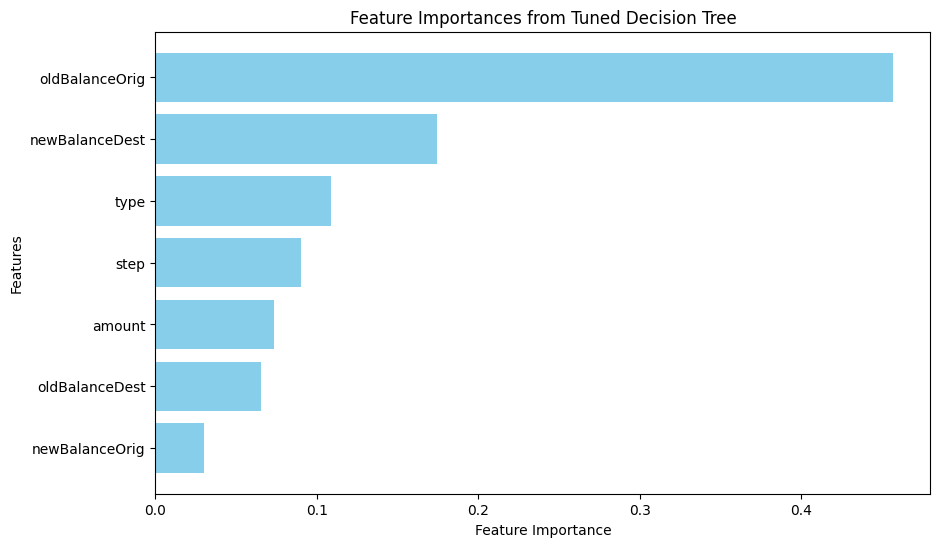

In [75]:
# Reference: https://builtin.com/data-science/feature-importance
# Plot the feature importances to identify the most influential features in the model
import matplotlib.pyplot as plt

feature_importances = dt_model_tuned.feature_importances_
sort = dt_model_tuned.feature_importances_.argsort()
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features[sort], feature_importances[sort], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances from Tuned Decision Tree")
plt.show()